BDAT problem set 3: Question 3 python 

In [1]:
### step 1 - import neccessary libraries
import pandas as pd
import random

In [56]:
### step 2
series_one = []
series_two = []
series_three = []

for i in range(100):
    number1 = random.randint(1, 4)
    number2 = random.randint(1, 3)
    number3 = random.randint(10000, 30000)
    
    # adding the number to. the list each time
    series_one.append(number1)
    series_two.append(number2)
    series_three.append(number3)


In [57]:
# check the length
print(len(series_one))
print(len(series_two))
print(len(series_three))

100
100
100


In [62]:
# step 3
joined_series = zip(series_one, series_two, series_three)
result = pd.DataFrame(list(joined_series))

result

,0,1,2
0,2,3,14658
1,4,1,16311
2,4,2,29883
3,4,2,12590
4,4,2,18845
...,...,...,...
95,1,1,26679
96,2,2,29427
97,2,2,16531
98,3,3,15720


In [63]:
# step 4
result.rename(columns={0: "bedrs", 1: "bathrs", 2:"price_sqr_meter"}, inplace=True)


In [64]:

result

,bedrs,bathrs,price_sqr_meter
0,2,3,14658
1,4,1,16311
2,4,2,29883
3,4,2,12590
4,4,2,18845
...,...,...,...
95,1,1,26679
96,2,2,29427
97,2,2,16531
98,3,3,15720


In [65]:
###step 6
result = result.reindex(list(range(300)))

In [66]:
### step 7
result["bigcolumn"] = series_one + series_two + series_three

In [8]:
result

,bedrs,bathrs,price_sqr_meter,bigcolumn
0,3.0,3.0,22688.0,3
1,1.0,3.0,17983.0,1
2,3.0,2.0,17975.0,3
3,1.0,3.0,23237.0,1
4,3.0,2.0,25098.0,3
...,...,...,...,...
295,NaN,NaN,NaN,27570
296,NaN,NaN,NaN,23885
297,NaN,NaN,NaN,13598
298,NaN,NaN,NaN,26775


#Question 4 - Wind statistics

In [9]:
import datetime
import pandas as pd
import numpy as np

In [12]:
# step 2
wind_data_path = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data"
wind_data = pd.read_csv(wind_data_path, sep="\s+")

In [13]:
wind_data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [14]:
# this function adds the Year, Month and Day together
# look into format string as an alternative
def to_datetime(year, month, day):
    res = f"19{int(year)}-{int(month)}-{int(day)}"
    return res

In [21]:
wind_data ["date_time"] = wind_data.apply(lambda x: to_datetime(x['Yr'], x['Mo'], x['Dy']), axis=1)


wind_data.drop(["Yr","Mo", "Dy"], axis = 1, inplace = True)
wind_data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date_time
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-1-1
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-1-2
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-1-3
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-1-4
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-1-5


In [22]:
# step 5
wind_data ["date_time"] = pd.to_datetime(wind_data["date_time"], infer_datetime_format=True)


wind_data.head()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date_time
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [23]:
# step 5
print(wind_data["date_time"].dtypes)
wind_data.set_index('date_time', inplace=True)
# https://stackoverflow.com/questions/29206612/difference-between-data-type-datetime64ns-and-m8ns
#https://www.reddit.com/r/learnpython/comments/f1fpd4/what_is_the_real_difference_between_dtypem8ns_and/
#https://pythonpedia.com/en/knowledge-base/29206612/difference-between-data-type--datetime64-ns---and---m8-ns---

datetime64[ns]


In [24]:
wind_data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [25]:
# step 6 
missing_data = wind_data.isnull().sum()
missing_data

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [26]:
non_missing_data = wind_data.notnull().sum().sum()
non_missing_data

78857

In [28]:
# dropping all the NA's
wind_data.dropna(inplace=True)


In [29]:
# step 8
wind_data.mean().mean()

10.222465245951712

In [30]:
# step 9
loc_stats = wind_data.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,7.970000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.670000,10.710000
50%,11.710000,10.130000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.250000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.380000,13.540000,9.670000,12.960000,11.420000,11.170000,11.580000,16.880000,19.860000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [31]:
# step 10 
day_stats = wind_data.apply(pd.Series.describe, axis=1)
day_stats.head()

,count,mean,std,min,25%,50%,75%,max
date_time,,,,,,,,
1961-01-04,12.0,6.619167,3.198126,1.79,4.5700,5.855,9.1175,11.75
1961-01-05,12.0,10.630000,2.445356,6.17,9.8075,11.170,12.1700,13.33
1961-01-06,12.0,8.240000,2.998063,4.42,6.3450,7.810,10.1375,13.21
1961-01-07,12.0,10.385000,3.072114,4.96,8.2375,9.395,13.5725,14.29
1961-01-08,12.0,10.487500,3.547237,5.91,7.6200,9.685,11.7925,16.62


In [33]:
# step 11
January_mean = wind_data.loc[wind_data.index.month==1, :].mean()
January_mean

RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [34]:
# step 12
yearly_frequency = wind_data.resample('Y').sum()
yearly_frequency

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-12-31,4150.58,3470.45,3836.17,2327.79,3652.53,2589.83,3275.31,2952.87,2914.46,3298.16,4512.33,4619.65
1962-12-31,4443.47,3674.61,4240.60,2521.09,3870.60,2684.35,3997.61,3196.39,3017.47,3509.16,4700.82,5198.84
1963-12-31,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964-12-31,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965-12-31,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966-12-31,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967-12-31,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968-12-31,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969-12-31,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [35]:
# step 13
monthly_frequency = wind_data.resample('M').sum()
monthly_frequency.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-01-31,377.16,291.86,336.97,177.84,273.24,212.53,270.48,225.44,216.41,246.75,345.02,372.88
1961-02-28,426.45,390.97,376.22,240.31,358.23,283.00,308.57,305.40,305.46,328.29,472.29,397.82
1961-03-31,287.82,299.63,281.34,191.72,277.17,231.66,245.93,251.89,272.70,296.72,433.79,416.31
1961-04-30,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,280.69,237.88,295.10,167.79,265.45,185.75,214.08,229.79,227.38,238.97,333.54,333.53


In [36]:
# step 14
weekly_frequency = wind_data.resample('W').sum()
weekly_frequency.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date_time,,,,,,,,,,,,
1961-01-08,61.58,52.04,50.25,28.29,42.53,31.21,54.68,29.66,40.75,42.14,57.08,66.13
1961-01-15,87.28,62.77,83.71,32.41,51.46,35.51,52.75,47.74,39.99,53.00,77.88,77.17
1961-01-22,72.60,57.00,70.09,25.76,53.80,41.63,46.97,43.75,35.35,40.16,59.96,62.08
1961-01-29,119.28,89.08,105.29,71.50,97.95,84.10,86.70,85.87,79.90,89.53,118.80,134.33
1961-02-05,117.79,108.22,88.33,57.73,93.53,63.75,85.43,59.84,68.75,66.22,98.09,83.55


#### Question 5

#Python-Chipo

In [2]:
###Step1
import pandas as pd
import numpy as np

In [3]:
###steps 2, 3 & 4
dataset = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chipo = pd.read_csv(dataset, sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
# step 5 & 6
number_observations = chipo.shape[0]
number_columns = chipo.shape[1]
print(f"number_observations:{number_observations}, number_columns:{number_columns}")

number_observations:4622, number_columns:5


In [5]:
# step 7 
print(chipo.columns.values)

['order_id' 'quantity' 'item_name' 'choice_description' 'item_price']


In [ ]:
# step 8 - index dataframe

# Use `iloc[]` to select row `0`
print(chipo.iloc[_])
# Use `loc[]` to select column `'A'`
print(df.loc[:,'_'])

In [11]:
# step 9
orders= chipo.groupby(['item_name'])[['item_name','quantity']].sum()
orders

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


In [12]:
orders = orders.reset_index()


In [14]:
# step 10
mostordered = orders[orders.quantity == orders.quantity.max()]
mostordered

,item_name,quantity
17,Chicken Bowl,761


In [18]:
# step 11

order_description1= chipo.groupby(['choice_description'])[['choice_description','quantity']].sum()
order_description1

,quantity
choice_description,
"[Adobo-Marinated and Grilled Chicken, Pinto Beans, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",1
"[Adobo-Marinated and Grilled Chicken, [Sour Cream, Cheese, Cilantro-Lime Rice]]",1
[Adobo-Marinated and Grilled Chicken],1
"[Adobo-Marinated and Grilled Steak, [Sour Cream, Salsa, Cheese, Cilantro-Lime Rice, Guacamole]]",1
[Adobo-Marinated and Grilled Steak],1
...,...
"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium)], [Rice, Black Beans, Cheese, Lettuce]]",2
"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium)], [Rice, Black Beans, Lettuce]]",1
"[[Tomatillo-Red Chili Salsa (Hot), Tomatillo-Green Chili Salsa (Medium)], [Rice, Pinto Beans, Cheese, Lettuce]]",1


In [16]:
order_description = order_description.reset_index()

In [19]:
mostordered_description = order_description1[order_description1.quantity == order_description1.quantity.max()]
mostordered_description

,quantity
choice_description,
[Diet Coke],159


In [21]:
# step 12
orders['quantity'].sum()

4972

In [22]:
# step 13
print(chipo['item_price'].dtypes)


object


In [23]:
def turn_to_float(dollar_value):
    price = dollar_value[1:]
    price_float = float(price)
    return price_float

res = turn_to_float("$4.05")
res

4.05

In [24]:
chipo['item_price'] = chipo.apply(lambda x: 
                                  turn_to_float(x['item_price']), axis=1)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [25]:
print(chipo['item_price'].dtypes)

float64


In [26]:
# step 14
Revenue = (chipo['quantity']*chipo['item_price']).sum()
Revenue

39237.02

In [27]:
# step 15
number_of_orders = chipo['quantity'].sum()
number_of_orders

4972

In [94]:
# step 16
avg_rev_per_ord = round(revenue/no_of_orders, 2)
avg_rev_per_ord

7.89

In [29]:
# step 17
chipo['item_name'].nunique()

50

In [100]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

#### Question 6

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import seaborn as sns
sns.set(color_codes=True)

#read dataset from local 
marriage_data = pd.read_csv("C:/Users/new/Downloads/us-marriages-divorces-1867-2014.csv")

marriage_data.set_index('Year', inplace=True)

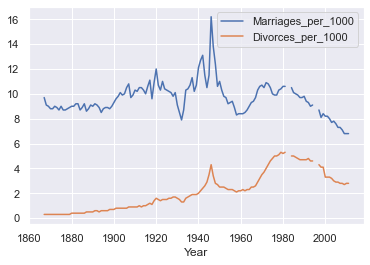

In [40]:
marriage_data[["Marriages_per_1000", "Divorces_per_1000"]].plot(kind='line', label="Divorces and Marriages per capital")

#### Question 7

In [41]:
Marriage_data1 = marriage_data[marriage_data.index.isin([1900, 1950,2000])]
Marriage_data1

,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
Year,,,,,
1900,709000.0,56000.0,76094000,9.3,0.7
1950,1667000.0,385000.0,151684000,11.0,2.5
2000,2315000.0,944000.0,282398000,8.2,3.3


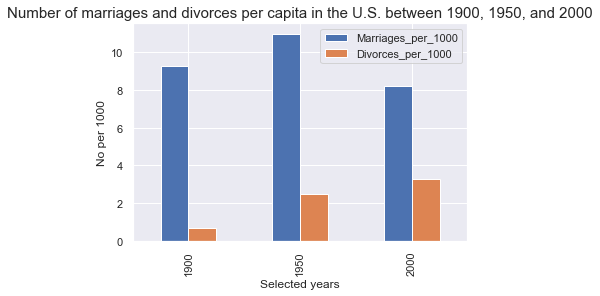

In [52]:
Marriage_data1[["Marriages_per_1000", "Divorces_per_1000"]].plot(kind='bar')
plt.xlabel('Selected years', fontsize=12)
plt.ylabel('No per 1000', fontsize=12)
plt.title('Number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000', fontsize=15)
plt.show()

#### Question 8

In [69]:
actorkills_data = pd.read_csv("C:/Users/new/Downloads/actor_kill_counts.csv")
actorkills_data

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [74]:
## set as index
actorkills_data.set_index(actorkills_data['Actor'], inplace=True)

In [71]:
%matplotlib inline

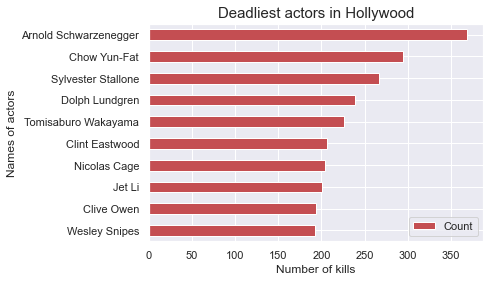

In [79]:
actorkills_data.sort_values('Count',inplace=True)
actorkills_data.plot(kind='barh',y='Count',x='Actor',color='r')
plt.xlabel('Number of kills', fontsize=12)
plt.ylabel('Names of actors', fontsize=12)
plt.title('Deadliest actors in Hollywood', fontsize=15)
plt.show()

#### Question 9

In [9]:
Remperor_df = pd.read_csv("C:/Users/new/Downloads/roman-emperor-reigns.csv")
Remperor_df

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012C090D3700>],
      dtype=object)

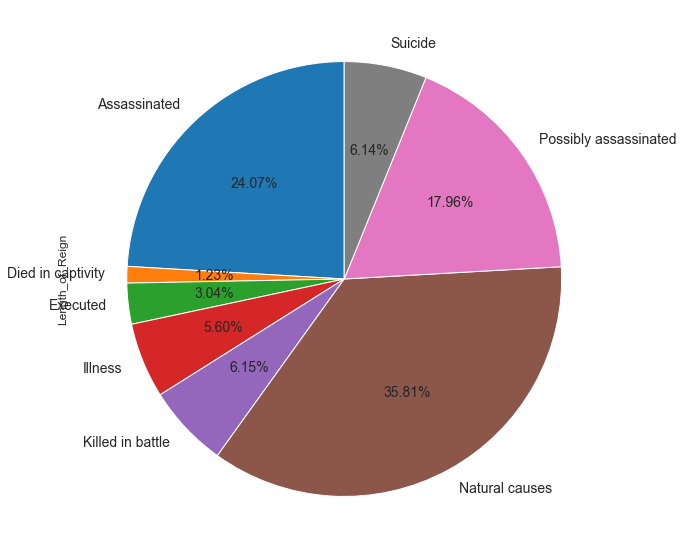

In [15]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
explode = (0, 0.5, 0, 0, 0, 0, 0, 0)
Remperor_df.groupby(['Cause_of_Death']).sum().plot(kind='pie', subplots=True, shadow=False,  legend = False, fontsize=14, startangle=90, figsize=(15,10), colors = colors, autopct='%1.2f%%')

Question 10

In [96]:
import seaborn as sns
revenue_Comp_df = pd.read_csv("C:/Users/new/Downloads/arcade-revenue-vs-cs-doctorates.csv")

In [97]:
revenue_Comp_df

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


Text(0.5, 1.0, 'Relationship between total revenue of arcades and Computer Science PhDs 2000 and 2009')

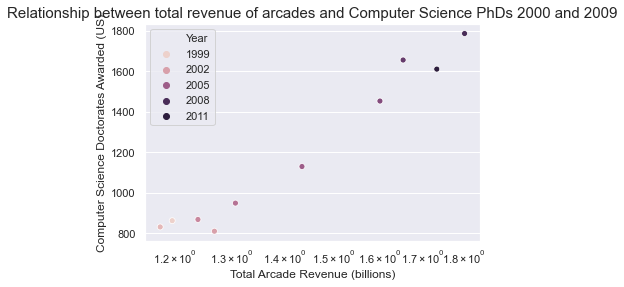

In [110]:
g =sns.scatterplot(x="Total Arcade Revenue (billions)", y = "Computer Science Doctorates Awarded (US)", hue="Year", data=revenue_Comp_df);
g.set(xscale="log")
plt.title('Relationship between total revenue of arcades and Computer Science PhDs 2000 and 2009', fontsize=15)